In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

2025-05-02 18:54:40.378198: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names = ['letter','x-box','y-box','width','height','onpix','x-bar','y-bar','x2bar','y2bar',
                'xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
df = pd.read_csv(url, header=None, names=column_names)

In [3]:

# Encode labels
encoder = LabelEncoder()
df['letter'] = encoder.fit_transform(df['letter'])


In [4]:

# Split features and target
X = df.drop('letter', axis=1)
y = df['letter']


In [5]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:

# One-hot encode target
y_cat = to_categorical(y)


In [7]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [9]:

model = Sequential()
model.add(Dense(128, input_shape=(16,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 classes for A-Z

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2593 - loss: 2.6938 - val_accuracy: 0.6684 - val_loss: 1.2144
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6453 - loss: 1.1862 - val_accuracy: 0.7538 - val_loss: 0.8882
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7152 - loss: 0.9260 - val_accuracy: 0.7719 - val_loss: 0.7634
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7475 - loss: 0.8102 - val_accuracy: 0.7981 - val_loss: 0.6738
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7636 - loss: 0.7482 - val_accuracy: 0.8144 - val_loss: 0.6107
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7897 - loss: 0.6750 - val_accuracy: 0.8431 - val_loss: 0.5485
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8072 - loss: 0.6286 - val_accuracy: 0.8528 - val_loss: 0.5056
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8256 - loss: 0.5743 - val_accuracy: 0.

In [11]:
import matplotlib.pyplot as plt


In [12]:

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

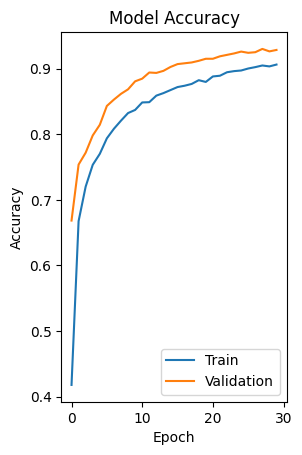

In [13]:

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


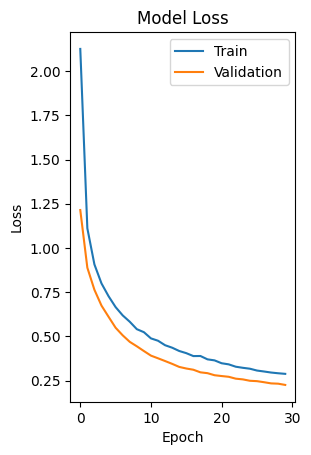

In [14]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


In [15]:

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9400 - loss: 0.2018
Test Accuracy: 0.9410
